### Пусть будем решать задачу классификации цены телефона (price_range), где 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('train.csv', sep=",")

In [3]:
data.shape

(2000, 21)

In [4]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Для данного датасета нет необходимости проводить удаление или заполнение пропусков и кодировать категориальные признаки.

In [35]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('price_range', axis=1)
y = data['price_range']

In [36]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=1)

In [38]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 70 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.93, 0.8925)

# Оптимизация гиперпараметра k

## Grid Search (решетчатый поиск)

In [39]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [40]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: total: 22.8 s
Wall time: 5.87 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [41]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00498023, 0.00536008, 0.0018146 , 0.        , 0.00313702,
        0.00312481, 0.00144386, 0.00314054, 0.00369735, 0.00987921]),
 'std_fit_time': array([0.00534506, 0.00613194, 0.00362921, 0.        , 0.00627403,
        0.00624962, 0.00099345, 0.00628109, 0.00606494, 0.00734386]),
 'mean_score_time': array([0.10395398, 0.11803503, 0.11054111, 0.12255139, 0.10226288,
        0.11134143, 0.11286898, 0.12194204, 0.09852967, 0.12536149]),
 'std_score_time': array([0.00804522, 0.00944427, 0.01810821, 0.01505829, 0.01743919,
        0.00765512, 0.01136766, 0.01098135, 0.01829773, 0.01418654]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

In [42]:
# Лучшее значение метрики
clf_gs.best_score_

0.929375

In [43]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 15}

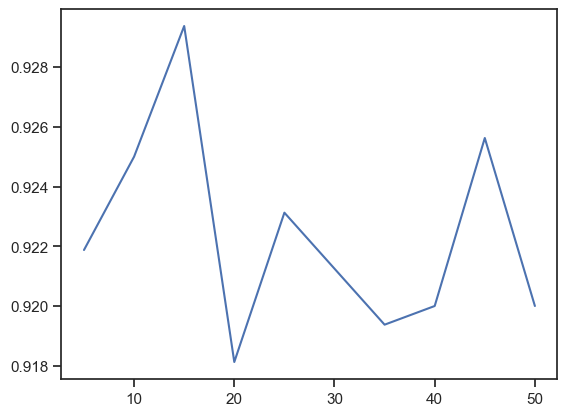

In [44]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Randomized Search (случайный поиск)
### Используется в том случае когда полный решетчатый поиск работает слишком долго.

In [45]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: total: 19.5 s
Wall time: 5.32 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [46]:
clf_rs.best_score_, clf_rs.best_params_

(0.929375, {'n_neighbors': 15})

In [47]:
clf_gs.best_score_, clf_gs.best_params_

(0.929375, {'n_neighbors': 15})

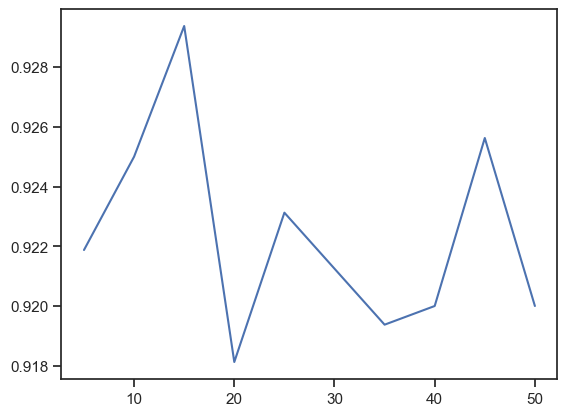

In [48]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

# K-fold кросс-валидация

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index].values
    X_test = X.iloc[test_index].values
    y_train = y.iloc[train_index].values
    y_test = y.iloc[test_index].values

    clf = KNeighborsClassifier(n_neighbors=70)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.915


## Leave P Out (LPO)

In [58]:
lpo = LeavePOut(p=2)
model = KNeighborsClassifier()


for train_index, test_index in lpo.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    accuracy = model.score(X_val_fold, y_val_fold)
    print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.5
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.5
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.5
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accura

KeyboardInterrupt: 